# FE12 - Univeratie Feature Selection

## Example Signal

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

t = pd.date_range(start='2020-09-23 15:00',
                 end='2020-09-23 15:02',
                 periods=120*100+1)
df = pd.DataFrame(index=t)
delta_t = df.index - df.index[0]
df['seconds'] = delta_t.seconds + delta_t.microseconds/1e6
np.random.seed(2020)
df['signal'] = np.sin(df.seconds/10 * 2 *np.pi) + 0.5*np.random.randn(df.shape[0])
idx = np.asarray(np.floor(df.reset_index().index / 100).values, np.int64)
df['window_idx'] = ['s{:03}'.format(i) for i in idx]

/Users/akem134/opt/anaconda3/envs/dslab/bin/python
{'numpy': '1.20.3', 'pandas': '1.4.3', 'seaborn': '0.11.2', 'sklearn': '1.0.2', 'matplotlib': '3.5.1'}


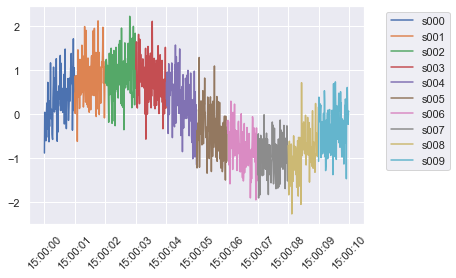

In [3]:
import dslab
import matplotlib.pyplot as plt

def plot_first_ten(df):
    for idx in np.unique(df['window_idx'])[:10]:
        plt.plot(df.signal[df.window_idx == idx], label=idx)
        plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
plot_first_ten(df)

In [4]:
df.tail()

,seconds,signal,window_idx
2020-09-23 15:01:59.960,119.96,0.552865,s119
2020-09-23 15:01:59.970,119.97,0.259067,s119
2020-09-23 15:01:59.980,119.98,-1.007435,s119
2020-09-23 15:01:59.990,119.99,0.304607,s119
2020-09-23 15:02:00.000,120.00,0.027652,s120


## EML01 - slide "Dictionary of feature calculators"

In [5]:
import tsfresh
tsfresh.__version__

'0.19.0'

In [6]:
from tsfresh.feature_extraction import settings

In [7]:
settings.__dict__.keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__file__', '__cached__', '__builtins__', 'range', 'UserDict', 'getfullargspec', 'product', 'cloudpickle', 'pd', 'feature_calculators', 'get_config_from_string', 'from_columns', 'PickableSettings', 'ComprehensiveFCParameters', 'MinimalFCParameters', 'EfficientFCParameters', 'IndexBasedFCParameters', 'TimeBasedFCParameters'])

In [8]:
[key for key in settings.__dict__.keys()]

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__file__',
 '__cached__',
 '__builtins__',
 'range',
 'UserDict',
 'getfullargspec',
 'product',
 'cloudpickle',
 'pd',
 'feature_calculators',
 'get_config_from_string',
 'from_columns',
 'PickableSettings',
 'ComprehensiveFCParameters',
 'MinimalFCParameters',
 'EfficientFCParameters',
 'IndexBasedFCParameters',
 'TimeBasedFCParameters']

In [9]:
'MinimalFCParameters'.endswith('FCParameters')

True

In [10]:
'from_columns'.endswith('FCParameters')

False

In [11]:
[key for key in settings.__dict__.keys() if key.endswith('FCParameters')]

['ComprehensiveFCParameters',
 'MinimalFCParameters',
 'EfficientFCParameters',
 'IndexBasedFCParameters',
 'TimeBasedFCParameters']

## Slide "Unconfigured feature calculator"

In [12]:
from tsfresh.feature_extraction.settings import MinimalFCParameters

minimal_fc = MinimalFCParameters()  # Create dictionary
minimal = sorted(minimal_fc.keys())  # Sort list of dictionary keys
print('Number of feature calculators: ', len(minimal))
print(minimal)

Number of feature calculators:  10
['absolute_maximum', 'length', 'maximum', 'mean', 'median', 'minimum', 'root_mean_square', 'standard_deviation', 'sum_values', 'variance']


## Slide "Extract minimal set of features"

In [13]:
from tsfresh.feature_extraction import extract_features

In [14]:
from tsfresh.feature_extraction import extract_features

X = extract_features(df.iloc[:-1], column_id='window_idx', column_sort='seconds',
                    default_fc_parameters=minimal_fc)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 13.32it/s]


In [15]:
X.head()

,signal__sum_values,signal__median,signal__mean,signal__length,signal__standard_deviation,signal__variance,signal__root_mean_square,signal__maximum,signal__absolute_maximum,signal__minimum
s000,30.428823,0.300985,0.304288,100.0,0.526175,0.276860,0.607825,1.718367,1.718367,-0.884423
s001,78.822224,0.723670,0.788222,100.0,0.513542,0.263725,0.940755,2.127565,2.127565,-0.618952
s002,90.612638,0.927061,0.906126,100.0,0.520109,0.270513,1.044786,2.232329,2.232329,-0.353899
s003,78.136326,0.788755,0.781363,100.0,0.498651,0.248653,0.926921,2.118002,2.118002,-0.568100
s004,32.253874,0.303399,0.322539,100.0,0.552713,0.305492,0.639940,1.577110,1.577110,-1.147521


In [16]:
X.nunique()

signal__sum_values            120
signal__median                120
signal__mean                  120
signal__length                  1
signal__standard_deviation    120
signal__variance              120
signal__root_mean_square      120
signal__maximum               120
signal__absolute_maximum      120
signal__minimum               120
dtype: int64

## Slide "Inspect example features"

In [17]:
example_features = ['signal__length', 'signal__minimum', 'signal__maximum', 'signal__mean']
X[example_features].head()

,signal__length,signal__minimum,signal__maximum,signal__mean
s000,100.0,-0.884423,1.718367,0.304288
s001,100.0,-0.618952,2.127565,0.788222
s002,100.0,-0.353899,2.232329,0.906126
s003,100.0,-0.568100,2.118002,0.781363
s004,100.0,-1.147521,1.577110,0.322539


## Slide "Visualize feature distributions"

(<Figure size 432x288 with 2 Axes>,
 (<AxesSubplot:ylabel='Count'>, <AxesSubplot:xlabel='signal__median'>))

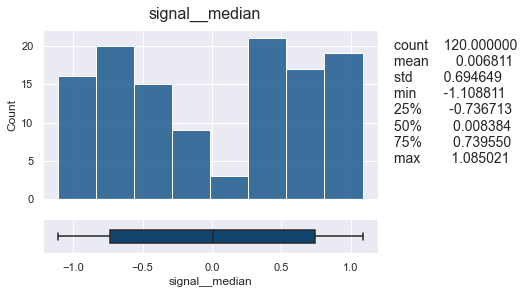

In [18]:
from dslab.visualization.visualize import distribution

distribution(X['signal__median'])

(<Figure size 432x288 with 2 Axes>,
 (<AxesSubplot:ylabel='Count'>, <AxesSubplot:xlabel='signal__variance'>))

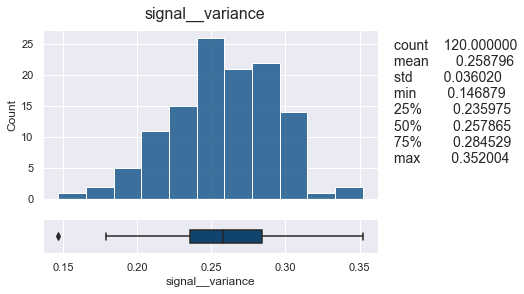

In [19]:
distribution(X['signal__variance'])

# Collinearity

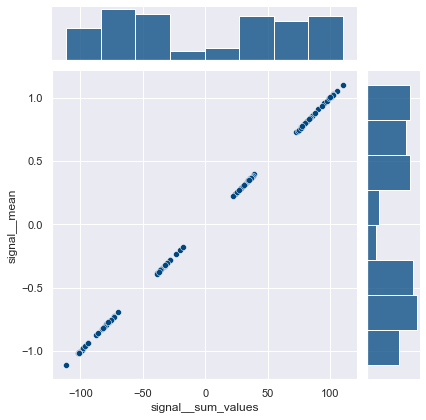

In [20]:
import seaborn as sns

sns.jointplot('signal__sum_values', 'signal__mean', data=X)

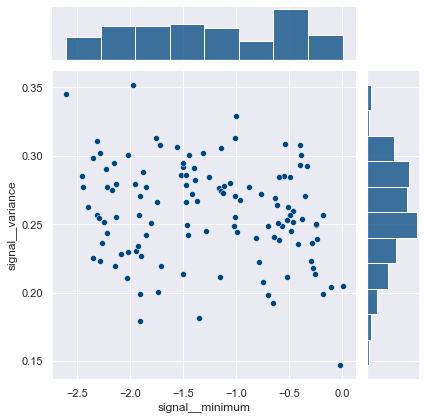

In [21]:
sns.jointplot('signal__minimum', 'signal__variance', data=X)

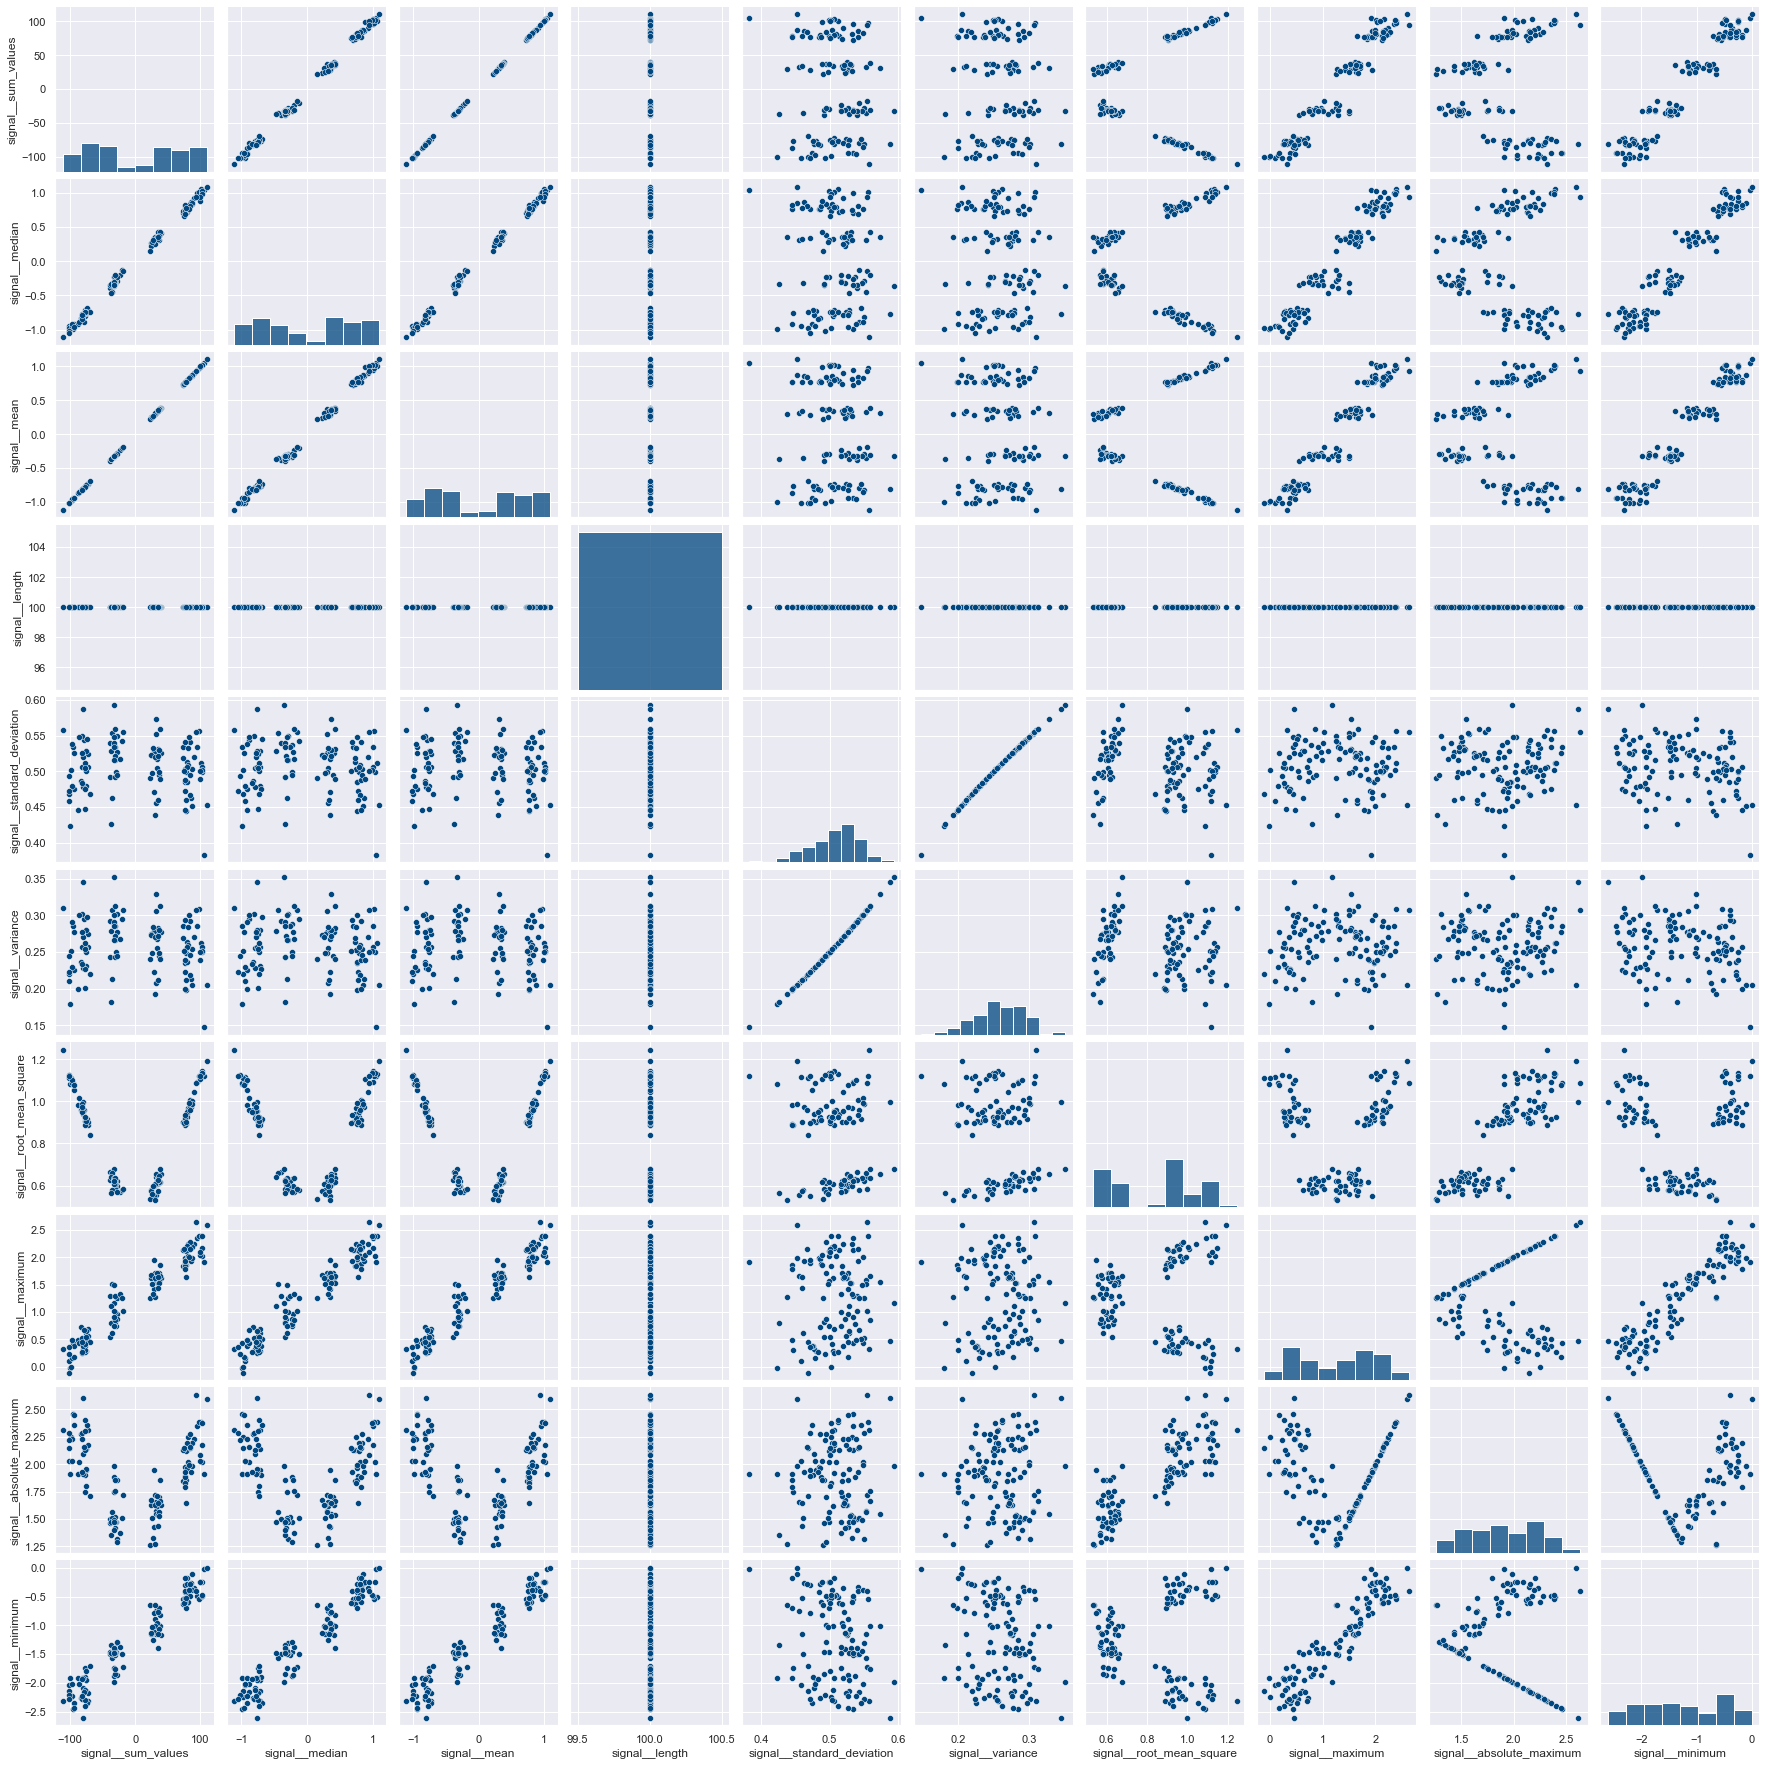

In [22]:
sns.pairplot(X)

## Classification target

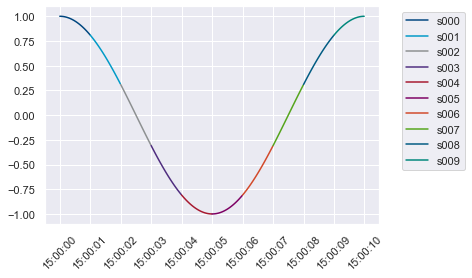

In [23]:
y = df.copy()
y['signal'] = np.cos(df.seconds/10 * 2 *np.pi)
plot_first_ten(y)

In [24]:
target = y.groupby('window_idx').signal.mean()[:-1] > 0
target

window_idx
s000     True
s001     True
s002     True
s003    False
s004    False
        ...  
s115    False
s116    False
s117    False
s118     True
s119     True
Name: signal, Length: 120, dtype: bool

In [25]:
labelled = pd.merge(y.reset_index(), target.reset_index(), how='left', on='window_idx')
labelled

,index,seconds,signal_x,window_idx,signal_y
0,2020-09-23 15:00:00.000,0.00,1.000000,s000,True
1,2020-09-23 15:00:00.010,0.01,0.999980,s000,True
2,2020-09-23 15:00:00.020,0.02,0.999921,s000,True
3,2020-09-23 15:00:00.030,0.03,0.999822,s000,True
4,2020-09-23 15:00:00.040,0.04,0.999684,s000,True
...,...,...,...,...,...
11996,2020-09-23 15:01:59.960,119.96,0.999684,s119,True
11997,2020-09-23 15:01:59.970,119.97,0.999822,s119,True
11998,2020-09-23 15:01:59.980,119.98,0.999921,s119,True
11999,2020-09-23 15:01:59.990,119.99,0.999980,s119,True


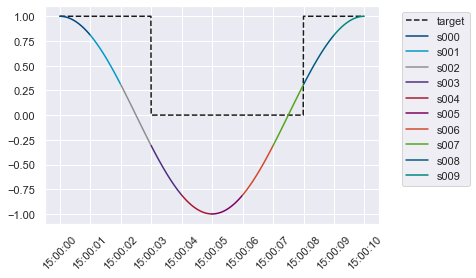

In [26]:
plt.plot(labelled['index'].iloc[:1000], labelled['signal_y'].iloc[:1000], '--k', label='target')
plot_first_ten(y)
plt.savefig('FE12-CSP_target.pdf', bbox_inches='tight')

In [27]:
from tsfresh.transformers import FeatureSelector
reg_select = FeatureSelector()
select = FeatureSelector()

In [28]:
select.fit(X, target)

FeatureSelector()

In [29]:
select.relevant_features

['signal__median',
 'signal__sum_values',
 'signal__mean',
 'signal__minimum',
 'signal__maximum']

In [30]:
select.p_values

array([6.15395232e-04, 6.27390569e-04, 6.27390569e-04, 2.04529342e-03,
       3.26245222e-03, 5.97854608e-01, 5.97854608e-01, 8.76951520e-01,
       9.68599551e-01,            nan])

In [31]:
select.features

['signal__median',
 'signal__sum_values',
 'signal__mean',
 'signal__minimum',
 'signal__maximum',
 'signal__standard_deviation',
 'signal__variance',
 'signal__absolute_maximum',
 'signal__root_mean_square',
 'signal__length']

(<Figure size 432x288 with 3 Axes>,
 (<AxesSubplot:ylabel='Count'>,
  <AxesSubplot:>,
  <AxesSubplot:xlabel='signal__median'>))

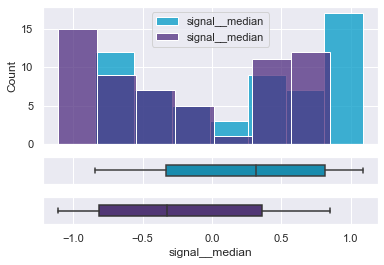

In [32]:
from dslab.visualization.visualize import distributions

distributions(X['signal__median'][target],
              X['signal__median'][~target], both_series=True)

(<Figure size 432x288 with 3 Axes>,
 (<AxesSubplot:ylabel='Count'>,
  <AxesSubplot:>,
  <AxesSubplot:xlabel='signal__root_mean_square'>))

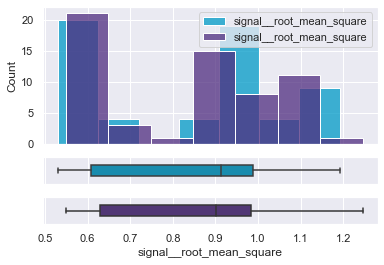

In [42]:
distributions(X['signal__root_mean_square'][target],
              X['signal__root_mean_square'][~target], both_series=True)

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1', solver='saga')

In [35]:
clf.fit(X[select.relevant_features], target)

LogisticRegression(penalty='l1', solver='saga')

In [36]:
pd.Series(clf.coef_[0,:], index=select.relevant_features)

signal__median        0.000000
signal__sum_values    0.008473
signal__mean          0.000000
signal__minimum       0.000000
signal__maximum       0.000000
dtype: float64

(<Figure size 432x288 with 3 Axes>,
 (<AxesSubplot:ylabel='Count'>,
  <AxesSubplot:>,
  <AxesSubplot:xlabel='signal__sum_values'>))

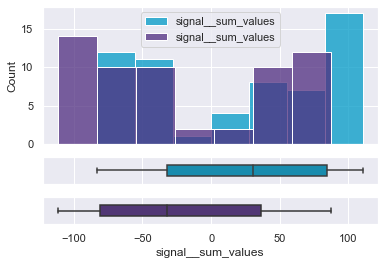

In [37]:
distributions(X['signal__sum_values'][target],
              X['signal__sum_values'][~target], both_series=True)

In [38]:
# Benjamini-Yekutieli for controlling the False-Discovery Rate 
K = len(select.features)
threshold = [(m+1)/(K * np.sum(1/(1+np.arange(K)))) * 0.05 for m in np.arange(K)]

In [39]:
threshold

[0.0017070857607370277,
 0.0034141715214740555,
 0.005121257282211083,
 0.006828343042948111,
 0.008535428803685139,
 0.010242514564422166,
 0.011949600325159194,
 0.013656686085896222,
 0.015363771846633248,
 0.017070857607370277]

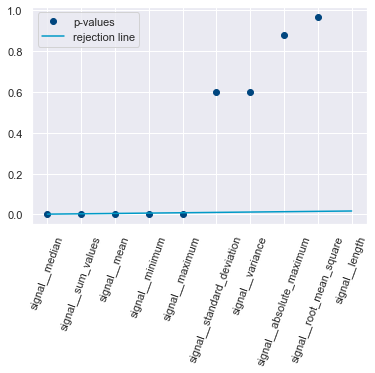

In [40]:
plt.plot(pd.Series(select.p_values,
                   index=select.features),'o',
        label='p-values')
plt.plot(threshold, label='rejection line')
_ = plt.xticks(rotation=70)
plt.legend()
plt.savefig('FE12-CSP_BY.pdf', bbox_inches='tight')

In [41]:
significance = pd.DataFrame({'p-values': select.p_values,
                          'threshold': threshold},
                          index=select.features)
significance['comparison'] = significance['p-values'] < significance['threshold']
significance

,p-values,threshold,comparison
signal__median,0.000615,0.001707,True
signal__sum_values,0.000627,0.003414,True
signal__mean,0.000627,0.005121,True
signal__minimum,0.002045,0.006828,True
signal__maximum,0.003262,0.008535,True
signal__standard_deviation,0.597855,0.010243,False
signal__variance,0.597855,0.011950,False
signal__absolute_maximum,0.876952,0.013657,False
signal__root_mean_square,0.968600,0.015364,False
signal__length,NaN,0.017071,False
